In [1]:
# Importing the Python libraries
# Polarity classification - Opinion Mining - Sentiment Analysis
import nltk
import pandas as pd
import wordcloud
from matplotlib import pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from datetime import date, datetime

%matplotlib inline

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
df = pd.read_csv("../input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
df.head()

id             dateAdded           dateUpdated  \
0  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
3  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
4  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   

                                                name       asins   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   

                                          categories primaryCategories  \
0  Computers,Electronics Features,Tablets,Electro...       Electronics   
1  Computers,Electronics Features,Tablets,Electro...       Electronics   
2  Computers,Electronics Features,Tablets,Electro...       Electronics   
3  Computers,Electronics Features,Tablets,Electro...       Electronics   
4  Computers,Electronics Features,Tablets,Electro...       Electronics   

                                           imageURLs  \
0  https://pisces.bbystatic.com/image2/BestBuy_US...   
1  https://pisces.bbystatic.com/image2/BestBuy_US...   
2  https://pisces.bbystatic.com/image2/BestBuy_US...   
3  https://pisces.bbystatic.com/image2/BestBuy_US...   
4  https://pisces.bbystatic.com/image2/BestBuy_US...   

                                                keys  ...  \
0  allnewkindleereaderblack6glarefreetouchscreend...  ...   
1  allnewkindleereaderblack6glarefreetouchscreend...  ...   
2  allnewkindleereaderblack6glarefreetouchscreend...  ...   
3  allnewkindleereaderblack6glarefreetouchscreend...  ...   
4  allnewkindleereaderblack6glarefreetouchscreend...  ...   

                                    reviews.dateSeen reviews.doRecommend  \
0  2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...               False   
1  2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...                True   
2                               2018-05-27T00:00:00Z                True   
3                               2018-10-09T00:00:00Z                True   
4                               2018-05-27T00:00:00Z                True   

    reviews.id reviews.numHelpful reviews.rating  \
0          NaN                  0              3   
1          NaN                  0              5   
2          NaN                  0              4   
3  177283626.0                  3              5   
4          NaN                  0              5   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5442403/review...   
1  http://reviews.bestbuy.com/3545/5442403/review...   
2  https://reviews.bestbuy.com/3545/5442403/revie...   
3  https://redsky.target.com/groot-domain-api/v1/...   
4  https://reviews.bestbuy.com/3545/5442403/revie...   

                                        reviews.text  \
0  I thought it would be as big as small paper bu...   
1  This kindle is light and easy to use especiall...   
2  Didnt know how much i'd use a kindle so went f...   
3  I am 100 happy with my purchase. I caught it o...   
4  Solid entry level Kindle. Great for kids. Gift...   

                                  reviews.title  reviews.username  \
0                                     Too small            llyyue   
1  Great light reader. Easy to use at the beach            Charmi   
2                           Great for the price      johnnyjojojo   
3                                   A Great Buy           Kdperry   
4      Solid entry-level Kindle. Great for kids       Johnnyblack   

                                          sourceURLs  
0  https://www.newegg.com/Product/Product.aspx%25...  
1  https://www.newe

In [3]:
mydf = df[['id', 'name', 'categories', 'reviews.text', 'reviews.title', 'reviews.username', 'reviews.date']]
mydf.head()

id                                               name  \
0  AVqVGZNvQMlgsOJE6eUY  Amazon Kindle E-Reader 6" Wifi (8th Generation...   
1  AVqVGZNvQMlgsOJE6eUY  Amazon Kindle E-Reader 6" Wifi (8th Generation...   
2  AVqVGZNvQMlgsOJE6eUY  Amazon Kindle E-Reader 6" Wifi (8th Generation...   
3  AVqVGZNvQMlgsOJE6eUY  Amazon Kindle E-Reader 6" Wifi (8th Generation...   
4  AVqVGZNvQMlgsOJE6eUY  Amazon Kindle E-Reader 6" Wifi (8th Generation...   

                                          categories  \
0  Computers,Electronics Features,Tablets,Electro...   
1  Computers,Electronics Features,Tablets,Electro...   
2  Computers,Electronics Features,Tablets,Electro...   
3  Computers,Electronics Features,Tablets,Electro...   
4  Computers,Electronics Features,Tablets,Electro...   

                                        reviews.text  \
0  I thought it would be as big as small paper bu...   
1  This kindle is light and easy to use especiall...   
2  Didnt know how much i'd use a kindle so went f...   
3  I am 100 happy with my purchase. I caught it o...   
4  Solid entry level Kindle. Great for kids. Gift...   

                                  reviews.title reviews.username  \
0                                     Too small           llyyue   
1  Great light reader. Easy to use at the beach           Charmi   
2                           Great for the price     johnnyjojojo   
3                                   A Great Buy          Kdperry   
4      Solid entry-level Kindle. Great for kids      Johnnyblack   

               reviews.date  
0  2017-09-03T00:00:00.000Z  
1  2017-06-06T00:00:00.000Z  
2  2018-04-20T00:00:00.000Z  
3  2017-11-02T17:33:31.000Z  
4  2018-04-24T00:00:00.000Z

In [4]:
def opinion(output, threshold):
    if output['neg'] > threshold:
        return 'neg_count'
    elif  output['pos'] > threshold:
        return 'pos_count'
    return 'neu_count'

In [5]:
def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons if start <= now <= end)

In [6]:
sia = SentimentIntensityAnalyzer()

mydict = {}
threshold = 0.2

for index, row in df.iterrows():
    ps = sia.polarity_scores(row['reviews.text'])
    if row['id'] not in mydict:
        mydict[row['id']] = ps
        mydict[row['id']]['count'] = 0
        mydict[row['id']]['neg_count'] = 0
        mydict[row['id']]['pos_count'] = 0
        mydict[row['id']]['neu_count'] = 0

    mydict[row['id']]['neg'] += ps['neg']
    mydict[row['id']]['neu'] += ps['neu']
    mydict[row['id']]['pos'] += ps['pos']
    mydict[row['id']]['compound'] += ps['compound']
    mydict[row['id']]['count'] += 1
    mydict[row['id']][opinion(ps, threshold)] += 1

print(mydict)

{'AVqVGZNvQMlgsOJE6eUY': {'neg': 2.6570000000000005, 'neu': 70.25500000000001, 'pos': 24.091, 'compound': 58.8058, 'count': 96, 'neg_count': 1, 'pos_count': 56, 'neu_count': 39}, 'AWFUWc8THh53nbDRF6YO': {'neg': 10.24, 'neu': 459.1859999999999, 'pos': 181.56199999999995, 'compound': 459.7326, 'count': 650, 'neg_count': 6, 'pos_count': 437, 'neu_count': 207}, 'AWK8z0pOIwln0LfXlSxH': {'neg': 3.8190000000000004, 'neu': 139.94000000000008, 'pos': 52.23300000000002, 'compound': 133.53910000000002, 'count': 195, 'neg_count': 2, 'pos_count': 139, 'neu_count': 54}, 'AV-XeQLWuC1rwyj_gbP5': {'neg': 0.536, 'neu': 3.0399999999999996, 'pos': 1.424, 'compound': 2.1677, 'count': 4, 'neg_count': 0, 'pos_count': 3, 'neu_count': 1}, 'AWMjT0WguC1rwyj_rFh3': {'neg': 9.675, 'neu': 410.8610000000001, 'pos': 170.4599999999999, 'compound': 397.43310000000065, 'count': 590, 'neg_count': 7, 'pos_count': 410, 'neu_count': 173}, 'AVpfIfGA1cnluZ0-emyp': {'neg': 2.377, 'neu': 14.475, 'pos': 6.148, 'compound': 9.5811

In [7]:
mydf2 = pd.DataFrame(mydict.values())
mydf2["id"] = mydict.keys()
mydf2 = mydf2.merge(mydf[["id", "name", "categories"]].drop_duplicates(), how = "left", on = "id")
mydf2

neg      neu      pos  compound  count  neg_count  pos_count  \
0    2.657   70.255   24.091   58.8058     96          1         56   
1   10.240  459.186  181.562  459.7326    650          6        437   
2    3.819  139.940   52.233  133.5391    195          2        139   
3    0.536    3.040    1.424    2.1677      4          0          3   
4    9.675  410.861  170.460  397.4331    590          7        410   
5    2.377   14.475    6.148    9.5811     22          4         15   
6   14.414  380.594  166.975  377.4081    561          7        405   
7    3.934  113.452   42.615   98.7709    159          2         99   
8   12.850  257.017  102.135  219.2217    371         10        237   
9    5.814  146.921   65.260  142.4927    217          1        162   
10   1.984   32.444   17.574   35.2718     51          1         36   
11   2.717   50.902   17.380   39.9671     70          0         40   
12   6.103  158.422   61.479  149.9345    225          1        147   
13   4.468   74.814   27.724   64.8389    106          4         69   
14   0.493   18.446    6.060   20.5963     24          0         14   
15   2.459   59.395   21.152   58.7155     82          1         54   
16  25.599  550.352  222.063  504.8001    797         22        527   
17  15.889  329.435  122.677  265.4110    467         16        290   
18   0.983   16.420    5.595   14.7948     22          2         13   
19   2.026   39.583   12.394   31.0861     53          0         28   
20   0.560   29.360   10.080   31.5449     39          0         27   
21   2.133   42.994   13.875   35.4664     58          0         33   
22   2.030   29.820    9.151   22.7641     40          4         20   
23   3.990   73.522   24.488   51.4680    101          5         60   

    neu_count                    id  \
0          39  AVqVGZNvQMlgsOJE6eUY   
1         207  AWFUWc8THh53nbDRF6YO   
2          54  AWK8z0pOIwln0LfXlSxH   
3           1  AV-XeQLWuC1rwyj_gbP5   
4         173  AWMjT0WguC1rwyj_rFh3   
5           3  AVpfIfGA1cnluZ0-emyp   
6         149  AVph0EeEilAPnD_x9myq   
7          58  AVqVGZSEQMlgsOJE6eUc   
8         124  AVpgdkC8ilAPnD_xsvyi   
9          54  AVqVGWLKnnc1JgDc3jF1   
10         14  AVqkIhkhv8e3D1O-lebZ   
11         30  AVqkIh9HQMlgsOJE6fu_   
12         77  AVpfpK8KLJeJML43BCuD   
13         33  AVpidLjVilAPnD_xEVpI   
14         10  AVqVGZO3nnc1JgDc3jGK   
15         27  AVphPmHuilAPnD_x3E5h   
16        248  AVqkIhwDv8e3D1O-lebb   
17        161  AVpjEN4jLJeJML43rpUe   
18          7  AVpftoij1cnluZ0-p5n2   
19         25  AVqkIj9snnc1JgDc3khU   
20         12  AVqVGZN9QMlgsOJE6eUZ   
21         25  AVqkIh8WQMlgsOJE6fu-   
22         16  AVqkIiKWnnc1JgDc3khH   
23         36  AVqkIdZiv8e3D1O-leaJ   

                                                 name  \
0   Amazon Kindle E-Reader 6" Wifi (8th Generation...   
1   Amazon Echo Show Alexa-enabled Bluetooth Speak...   
2   Amazon Echo Show Alexa-enabled Bluetooth Speak...   
3   Amazon Fire TV with 4K Ultra HD and Alexa Voic...   
4         Amazon - Echo Plus w/ Built-In Hub - Silver   
5   Amazon 9W PowerFast Official OEM USB Charger a...   
6   Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...   
7   Kindle E-reader - White, 6 Glare-Free Touchscr...   
8   Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...   
9   Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...   
10  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
11  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
12  Amazon Tap - Alexa-Enabled Portable Bluetooth ...   
13  Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...   
14  Kindle Oasis E-reader with Leather Charging Co...   
15          Amazon - Kindle Voyage - 6" - 4GB - Black   
16  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...   
17  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...   
18  Amazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black   
19  Fire HD 8 Tablet with Alexa, 8" HD Display, 32...   
20  Kindle Oasis E-reader with Leather Charging Co...   
2

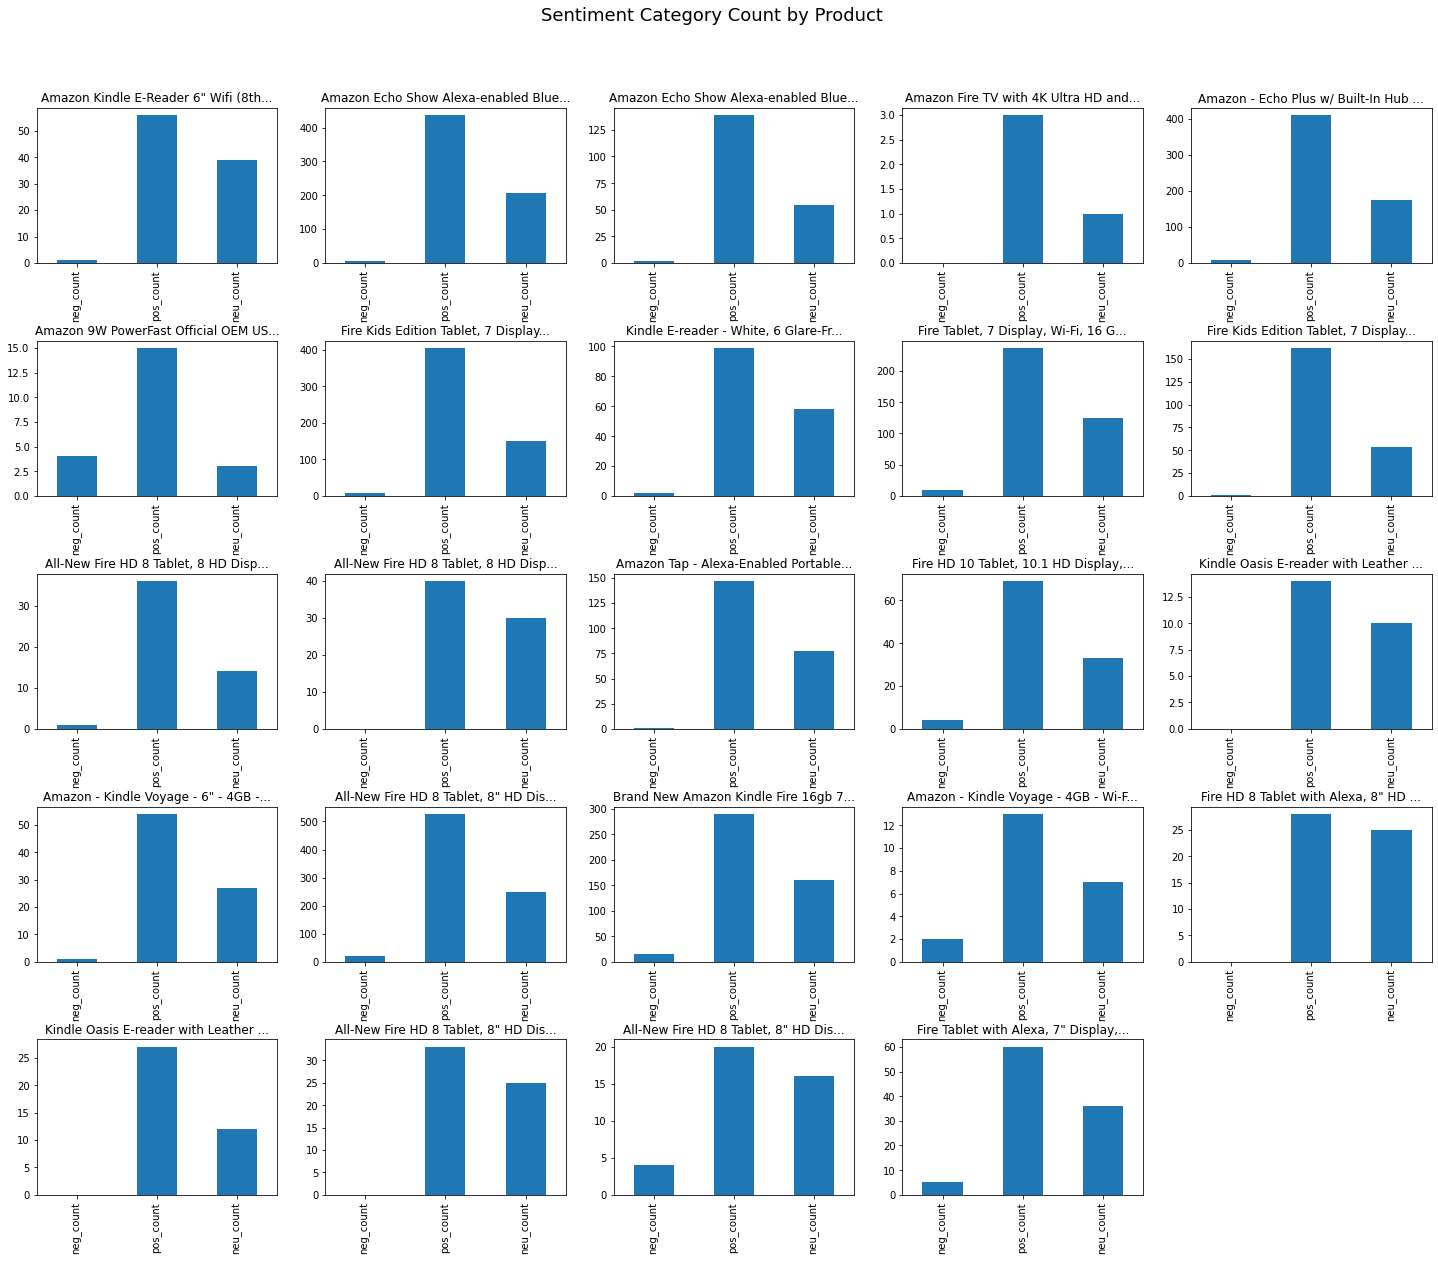

In [8]:
plt.figure(figsize=(25, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Sentiment Category Count by Product", fontsize=18, y=0.95)

for n, row in mydf2.iterrows():
    ax = plt.subplot(5, 5, n + 1)
    row[["neg_count", "pos_count", "neu_count"]].plot.bar(ax=ax)
    
    # chart formatting
    ax.set_title(row[9][:35] + "...")

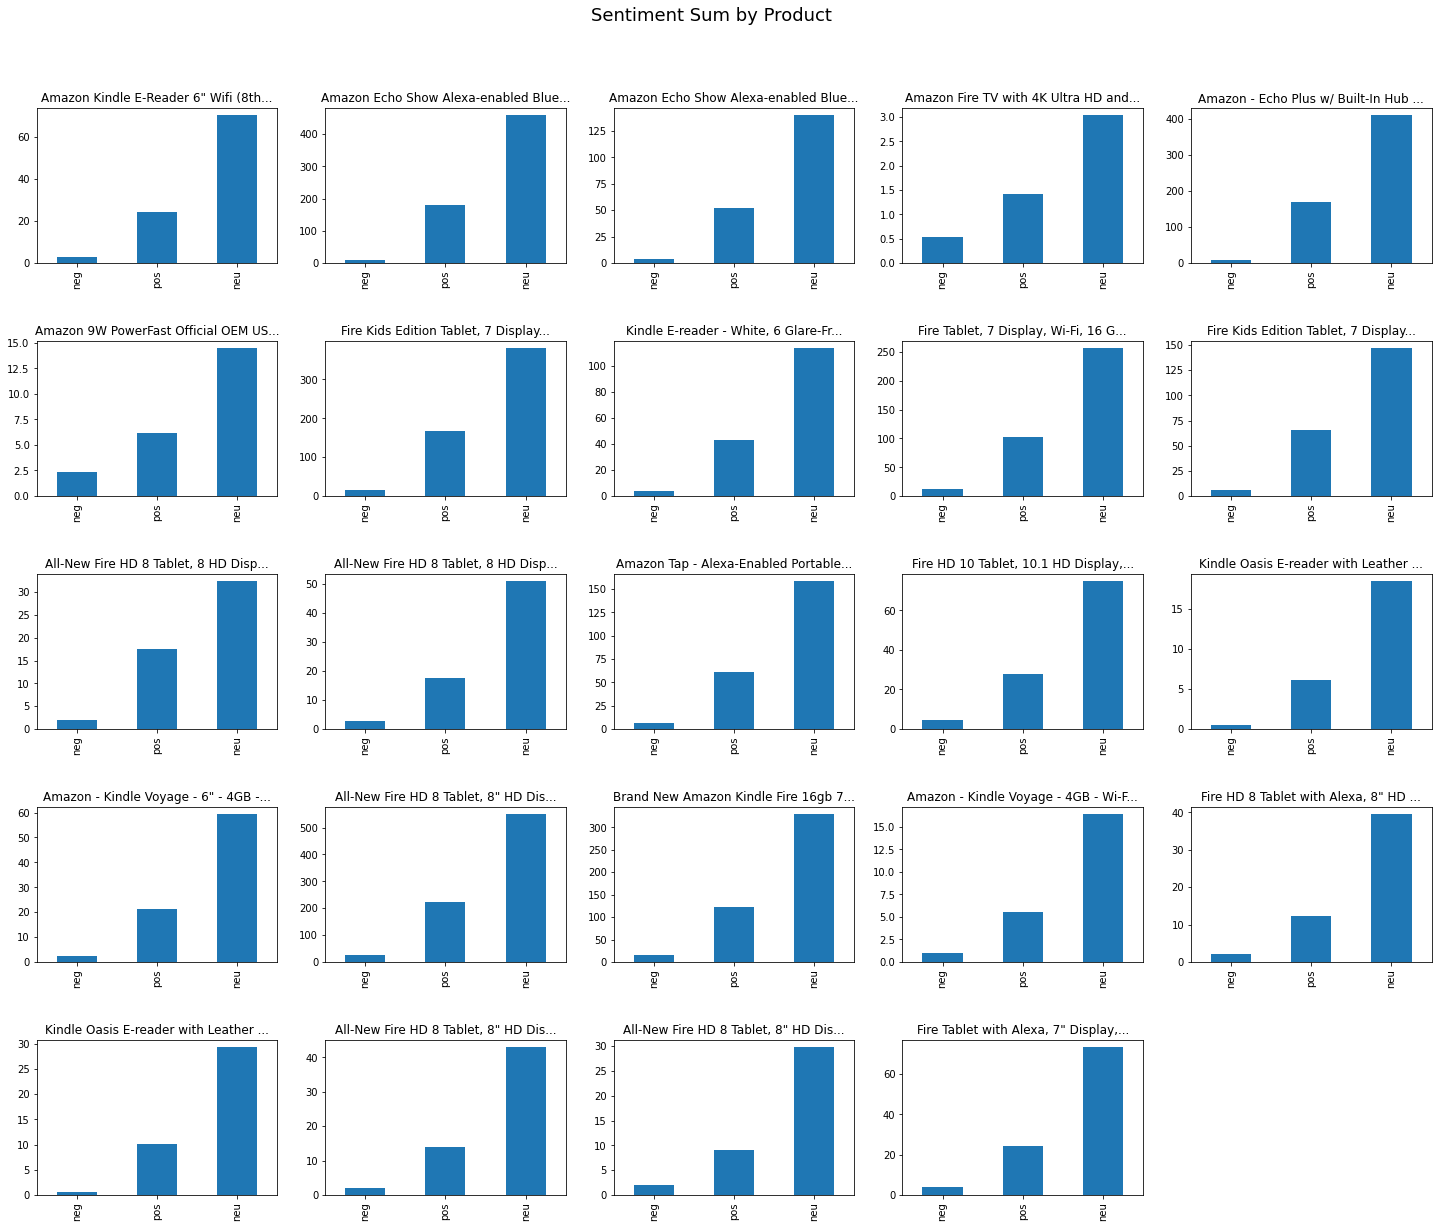

In [9]:
plt.figure(figsize=(25, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Sentiment Sum by Product", fontsize=18, y=0.95)

for n, row in mydf2.iterrows():
    ax = plt.subplot(5, 5, n + 1)
    row[["neg", "pos", "neu"]].plot.bar(ax=ax)
       
    # chart formatting
    ax.set_title(row[9][:35] + "...")

<AxesSubplot:title={'center':'Sentiment Counts by Product'}>

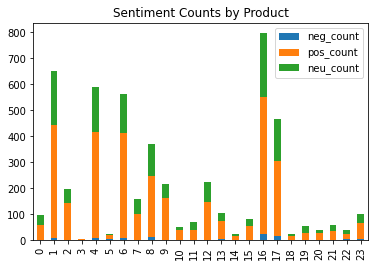

In [10]:
mydf2[["neg_count", "pos_count", "neu_count"]].plot.bar(stacked=True, title= "Sentiment Counts by Product")

<AxesSubplot:title={'center':'Sentiment Sums by Product'}>

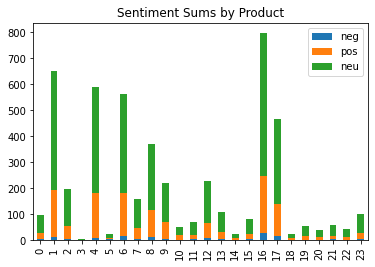

In [11]:
mydf2[["neg", "pos", "neu"]].plot.bar(stacked=True, title= "Sentiment Sums by Product")

<AxesSubplot:title={'center':'Normalised Sentiment Counts by Product'}>

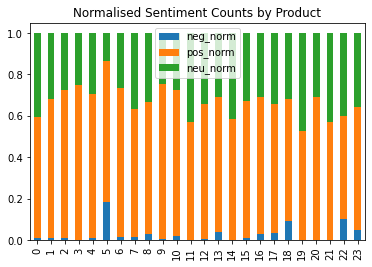

In [12]:
mydf2["neg_norm"] = mydf2["neg_count"] / mydf2["count"]
mydf2["pos_norm"] = mydf2["pos_count"] / mydf2["count"]
mydf2["neu_norm"] = mydf2["neu_count"] / mydf2["count"]

mydf2[["neg_norm", "pos_norm", "neu_norm"]].plot.bar(stacked=True, title= "Normalised Sentiment Counts by Product")

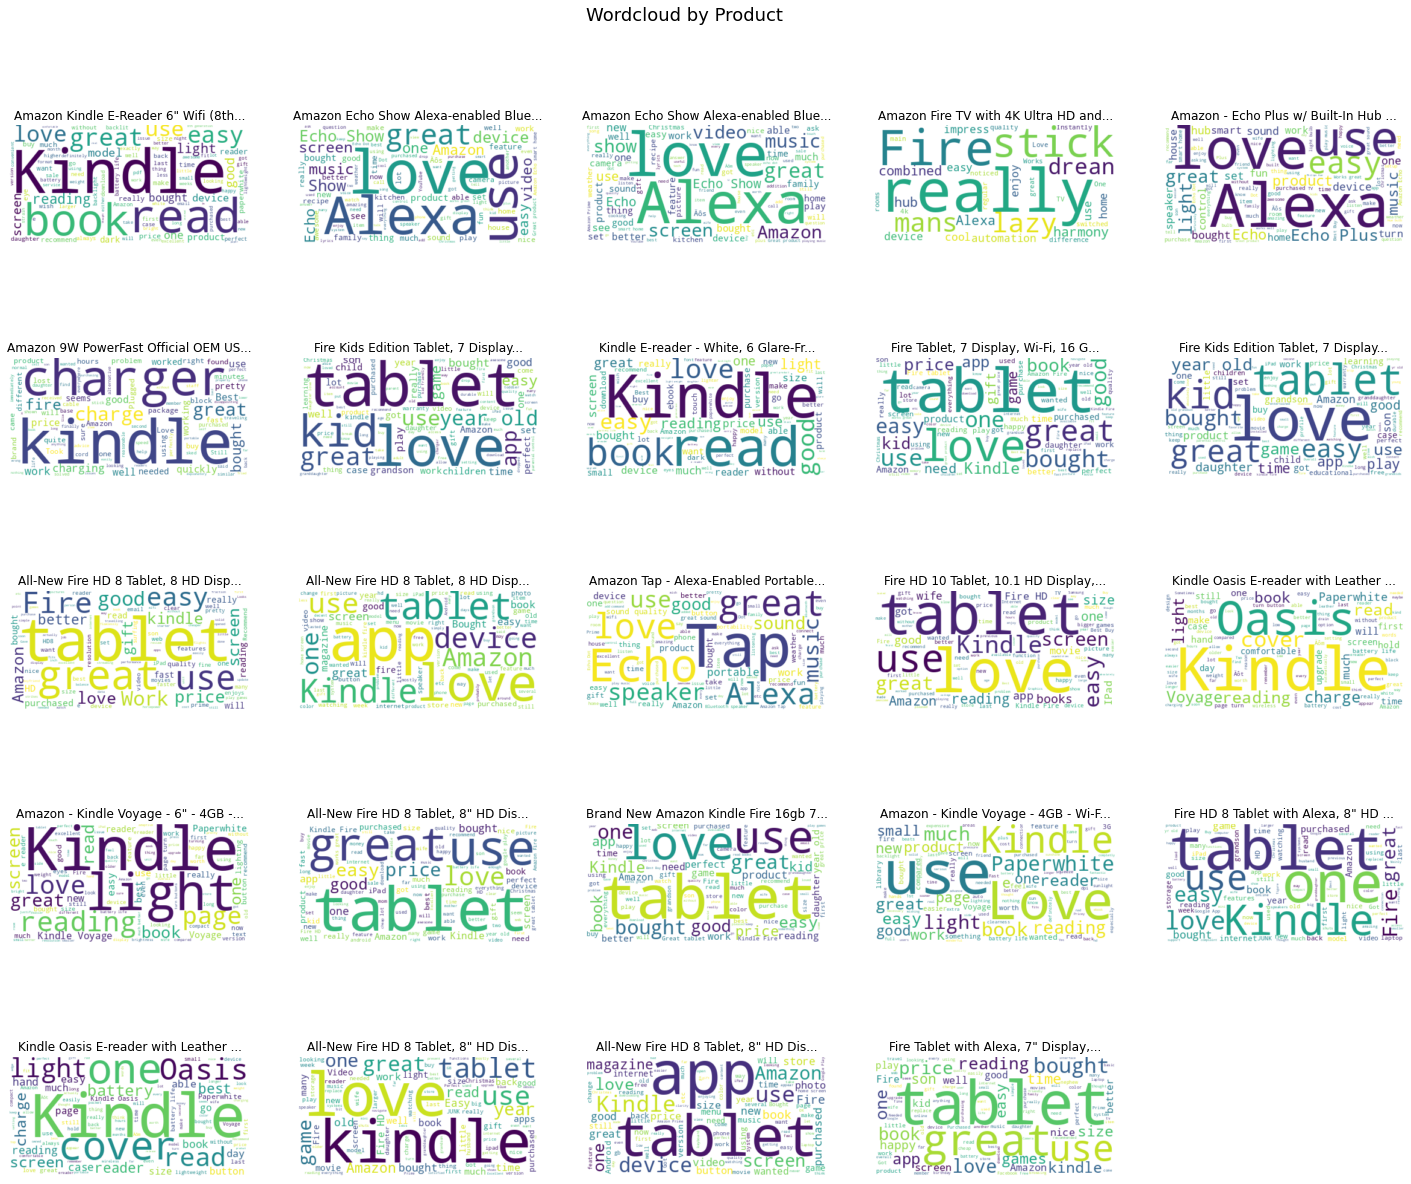

In [13]:
# Make the same grid but with wordclouds
plt.figure(figsize=(25, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Wordcloud by Product", fontsize=18, y=0.95)

for n, row in mydf2.iterrows():
    ax = plt.subplot(5, 5, n + 1)
    text = " ".join(list(mydf.loc[df['id'] == row.id]["reviews.text"]))
    
    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(row[9][:35] + "...")
    plt.axis("off")

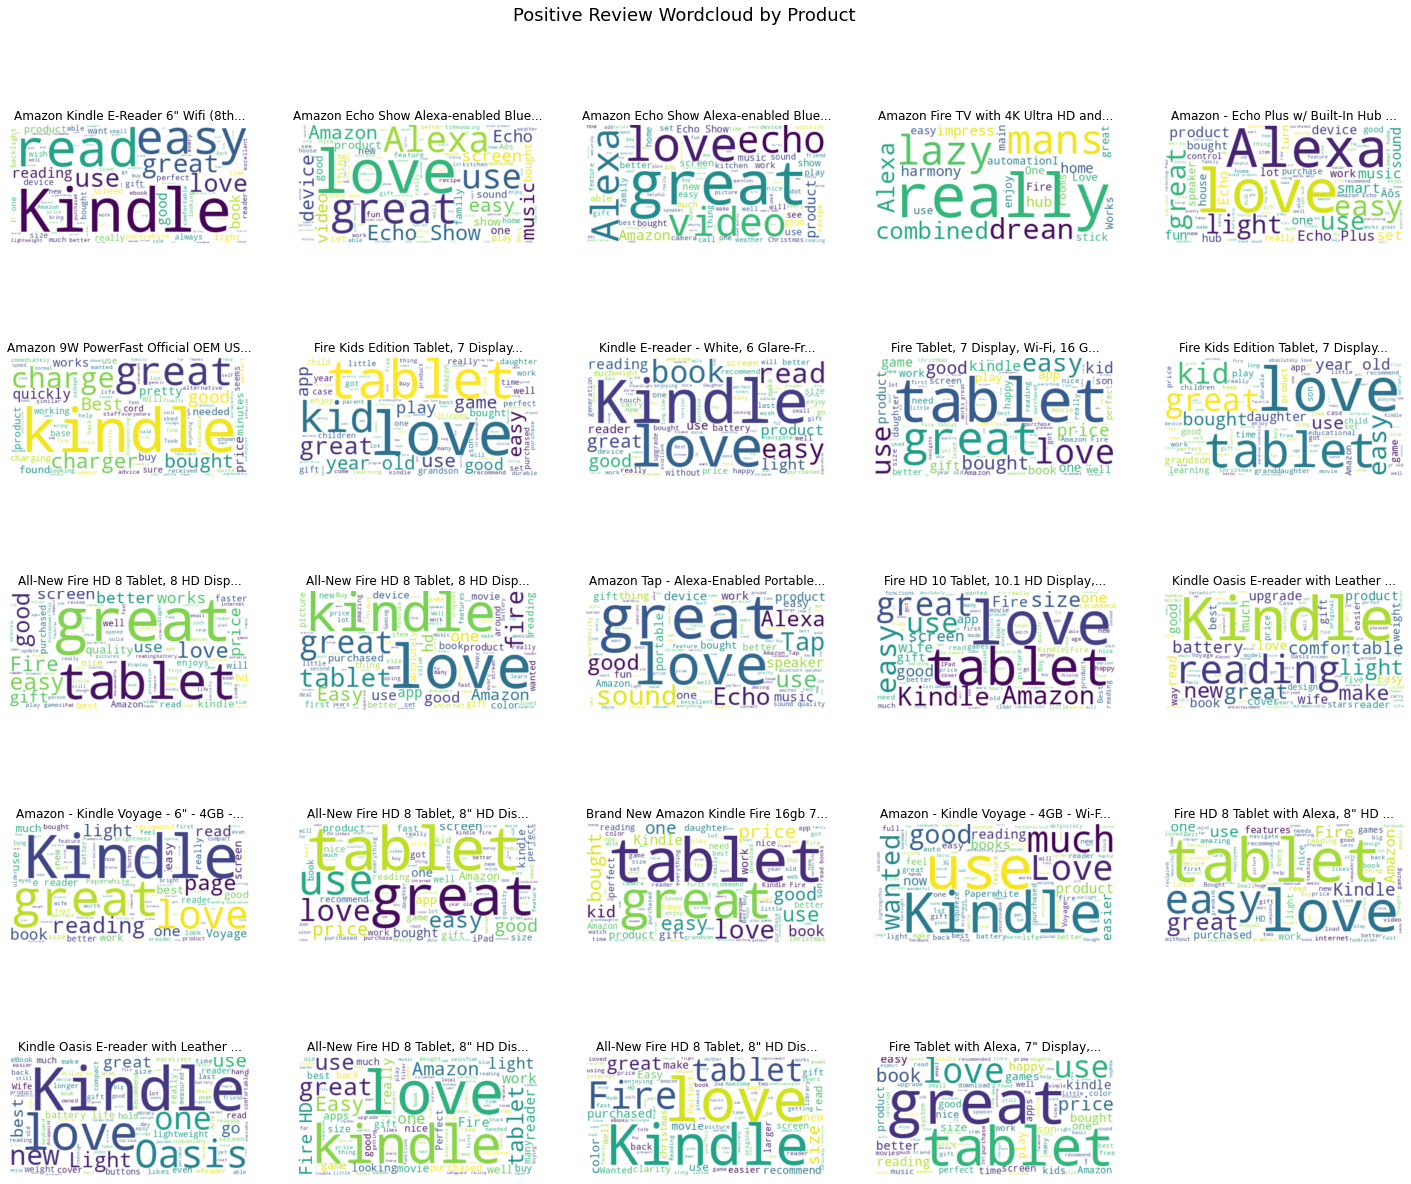

In [14]:
# Make the same grid but with wordclouds
plt.figure(figsize=(25, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Positive Review Wordcloud by Product", fontsize=18, y=0.95)

for n, row in mydf2.iterrows():
    ax = plt.subplot(5, 5, n + 1)
    reviews = list(mydf.loc[df['id'] == row.id]["reviews.text"])
    text = ""
    for rev in reviews:
        ps = sia.polarity_scores(rev)
        if opinion(ps, threshold) == "pos_count":
            text += rev
    
    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(row[9][:35] + "...")
    plt.axis("off")

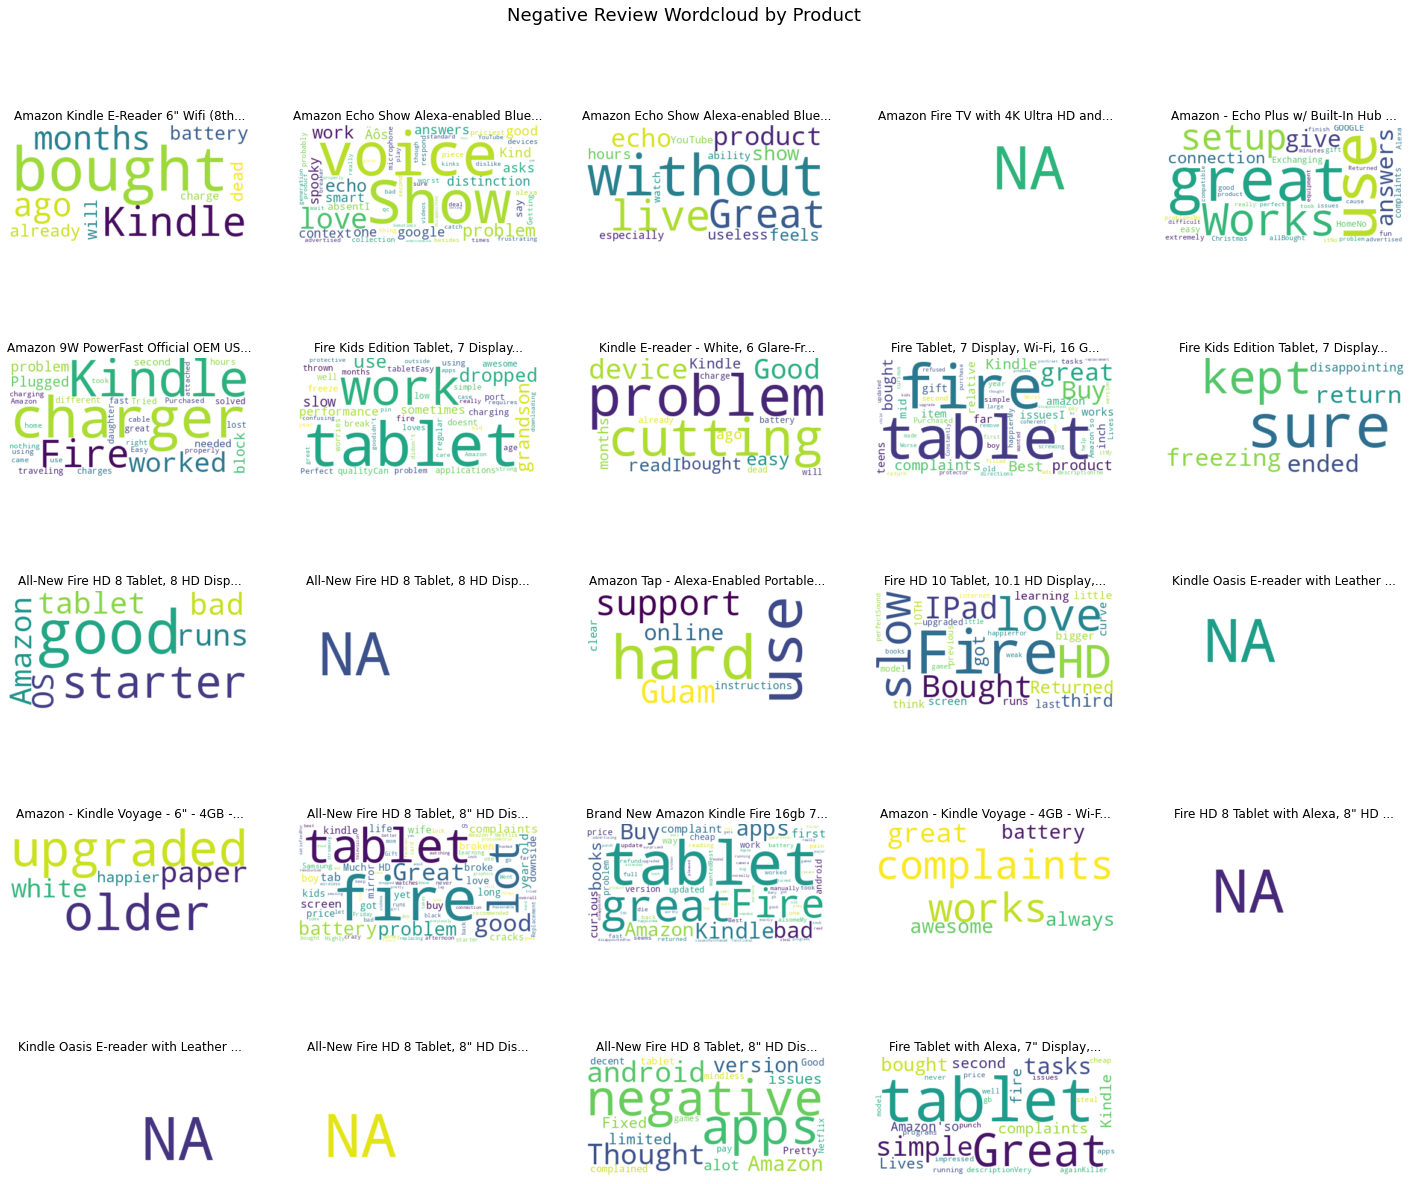

In [15]:
# Make the same grid but with wordclouds
plt.figure(figsize=(25, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Negative Review Wordcloud by Product", fontsize=18, y=0.95)

for n, row in mydf2.iterrows():
    ax = plt.subplot(5, 5, n + 1)
    reviews = list(mydf.loc[df['id'] == row.id]["reviews.text"])
    text = ""
    for rev in reviews:
        ps = sia.polarity_scores(rev)
        if opinion(ps, threshold) == "neg_count":
            text += rev
    if not text:
        text = "NA"
    
    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(row[9][:35] + "...")
    plt.axis("off")

In [16]:
Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

In [17]:
season_df = pd.DataFrame({})
season_dict = {}

for n, row in df.iterrows():
    if row['id'] not in season_dict:
        season_dict[row['id']] = {}
        season_dict[row['id']]['name'] = None
        season_dict[row['id']]['spring'] = 0
        season_dict[row['id']]['summer'] = 0
        season_dict[row['id']]['autumn'] = 0
        season_dict[row['id']]['winter'] = 0
        season_dict[row['id']]['lastestdate'] = None
    
    season_datatime = datetime.strptime(row['reviews.date'][:10], '%Y-%m-%d')
    season_string = get_season(season_datatime)
    season_dict[row['id']]['name'] = row['name']
    season_dict[row['id']][season_string] += 1
    if season_dict[row['id']]['lastestdate'] == None or season_datatime > season_dict[row['id']]['lastestdate']:
        season_dict[row['id']]['lastestdate'] = season_datatime

print(season_dict)

{'AVqVGZNvQMlgsOJE6eUY': {'name': 'Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)', 'spring': 16, 'summer': 12, 'autumn': 25, 'winter': 43, 'lastestdate': datetime.datetime(2018, 5, 23, 0, 0)}, 'AWFUWc8THh53nbDRF6YO': {'name': 'Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen', 'spring': 37, 'summer': 75, 'autumn': 208, 'winter': 330, 'lastestdate': datetime.datetime(2018, 9, 15, 0, 0)}, 'AWK8z0pOIwln0LfXlSxH': {'name': 'Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen', 'spring': 27, 'summer': 11, 'autumn': 51, 'winter': 106, 'lastestdate': datetime.datetime(2018, 5, 24, 0, 0)}, 'AV-XeQLWuC1rwyj_gbP5': {'name': 'Amazon Fire TV with 4K Ultra HD and Alexa Voice Remote (Pendant Design) | Streaming Media Player', 'spring': 3, 'summer': 0, 'autumn': 1, 'winter': 0, 'lastestdate': datetime.datetime(2018, 5, 25, 0, 0)}, 'AWMjT0WguC1rwyj_rFh3': {'name': 'Amazon - Echo Plus w/ Built-In Hub - Silver', 'spring': 28, 'summer': 0, 'autumn': 216, 'winter': 346, 

In [18]:
season_df = pd.DataFrame(season_dict.values())
season_df["id"] = season_dict.keys()
season_df

name  spring  summer  autumn  \
0   Amazon Kindle E-Reader 6" Wifi (8th Generation...      16      12      25   
1   Amazon Echo Show Alexa-enabled Bluetooth Speak...      37      75     208   
2   Amazon Echo Show Alexa-enabled Bluetooth Speak...      27      11      51   
3   Amazon Fire TV with 4K Ultra HD and Alexa Voic...       3       0       1   
4         Amazon - Echo Plus w/ Built-In Hub - Silver      28       0     216   
5   Amazon 9W PowerFast Official OEM USB Charger a...       4      10       6   
6   Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...     105      30     115   
7   Kindle E-reader - White, 6 Glare-Free Touchscr...      22      26      49   
8   Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...      80     136      53   
9   Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...      47       8      41   
10  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...       6       0      14   
11  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...      16       0       8   
12  Amazon Tap - Alexa-Enabled Portable Bluetooth ...      27      88      48   
13  Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...      31      37       4   
14  Kindle Oasis E-reader with Leather Charging Co...      12       3       5   
15          Amazon - Kindle Voyage - 6" - 4GB - Black      16      26      18   
16  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...     127       0     119   
17  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...     103     141      81   
18  Amazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black       5       9       1   
19  Fire HD 8 Tablet with Alexa, 8" HD Display, 32...       9       0       7   
20  Kindle Oasis E-reader with Leather Charging Co...      13      11       5   
21  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...       9       0       6   
22  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...       5       0       5   
23  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...      19      29      18   

    winter lastestdate                    id  
0       43  2018-05-23  AVqVGZNvQMlgsOJE6eUY  
1      330  2018-09-15  AWFUWc8THh53nbDRF6YO  
2      106  2018-05-24  AWK8z0pOIwln0LfXlSxH  
3        0  2018-05-25  AV-XeQLWuC1rwyj_gbP5  
4      346  2018-04-21  AWMjT0WguC1rwyj_rFh3  
5        2  2017-07-07  AVpfIfGA1cnluZ0-emyp  
6      311  2017-06-02  AVph0EeEilAPnD_x9myq  
7       62  2018-05-17  AVqVGZSEQMlgsOJE6eUc  
8      102  2017-08-30  AVpgdkC8ilAPnD_xsvyi  
9      121  2017-06-02  AVqVGWLKnnc1JgDc3jF1  
10      31  2017-04-03  AVqkIhkhv8e3D1O-lebZ  
11      46  2017-05-26  AVqkIh9HQMlgsOJE6fu_  
12      62  2018-04-11  AVpfpK8KLJeJML43BCuD  
13      34  2017-08-26  AVpidLjVilAPnD_xEVpI  
14       4  2017-06-30  AVqVGZO3nnc1JgDc3jGK  
15      22  2018-03-21  AVphPmHuilAPnD_x3E5h  
16     551  2017-06-04  AVqkIhwDv8e3D1O-lebb  
17     142  2017-08-04  AVpjEN4jLJeJML43rpUe  
18       7  2016-05-07  AVpftoij1cnluZ0-p5n2  
19      37  2017-06-03  AVqkIj9snnc1JgDc3khU  
20      10  2017-07-22  AVqVGZN9QMlgsOJE6eUZ  
21      43  2017-06-02  AVqkIh8WQMlgsOJE6fu-  
22      30  2017-05-07  AVqkIiKWnnc1JgDc3khH  
23      35  2017-05-22  AVqkIdZiv8e3D1O-leaJ

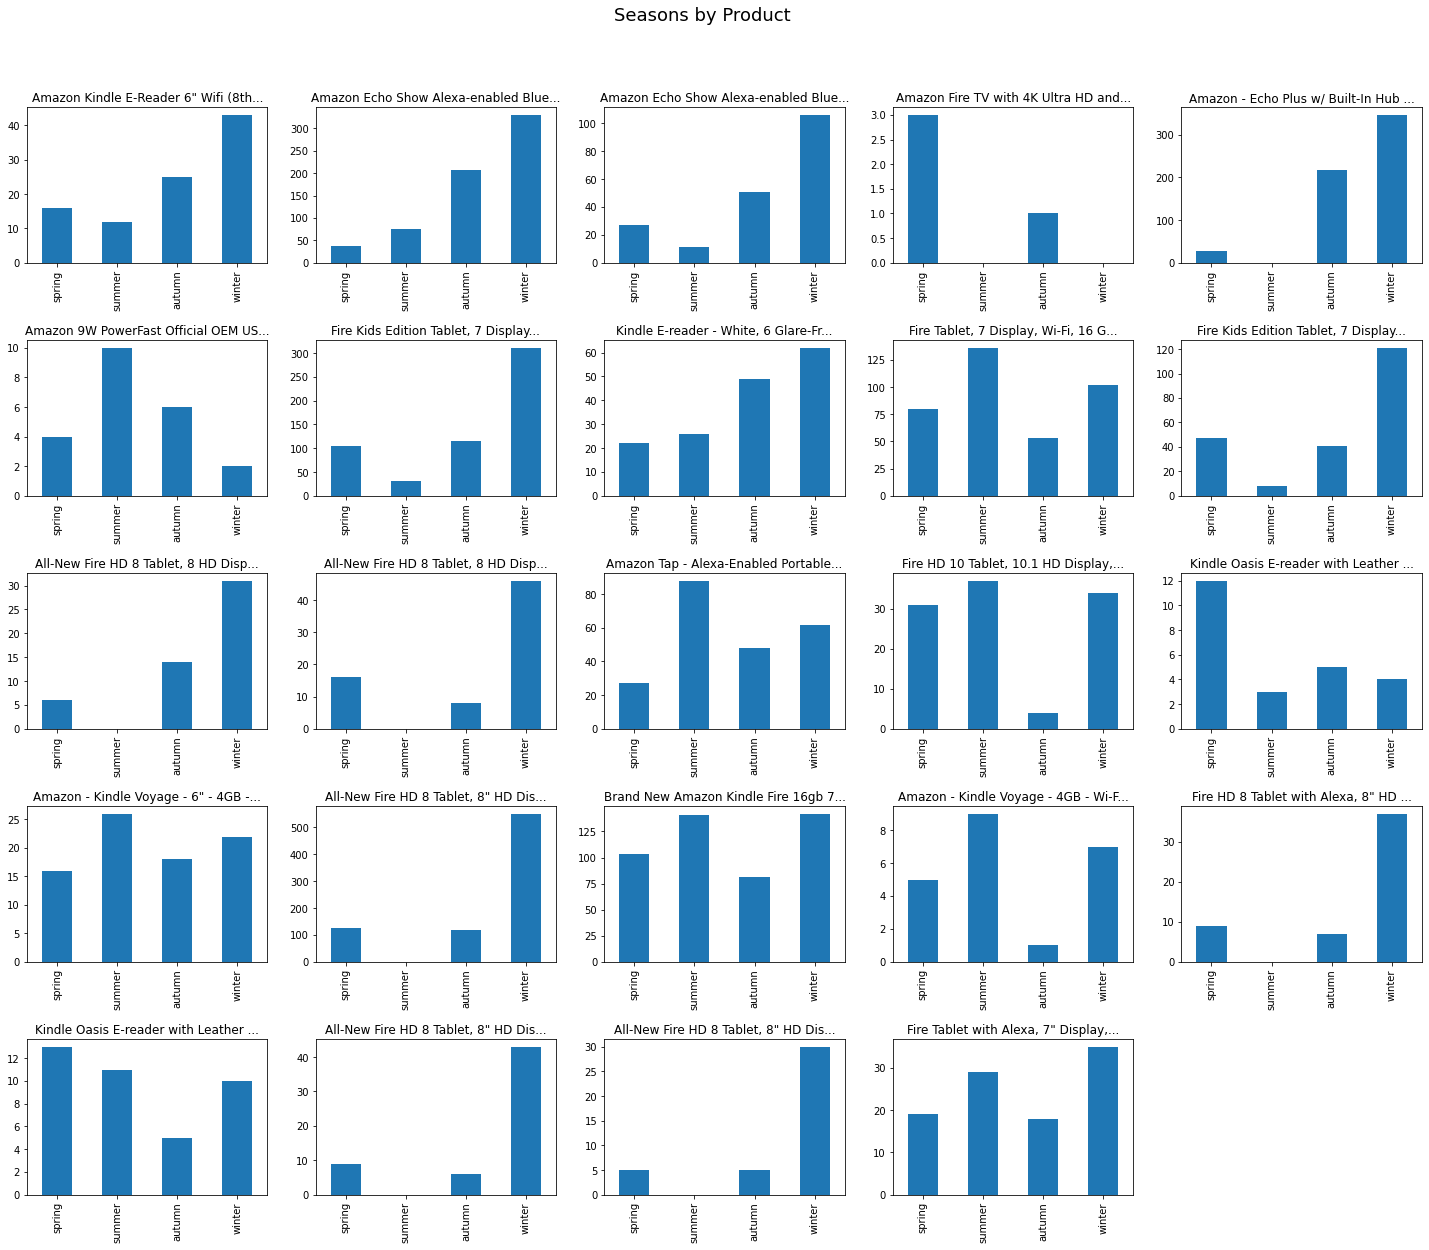

In [19]:
plt.figure(figsize=(25, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Seasons by Product", fontsize=18, y=0.95)

for n, row in season_df.iterrows():
    ax = plt.subplot(5, 5, n + 1)
    row[["spring", "summer", "autumn", "winter"]].plot.bar(ax=ax)
       
    # chart formatting
    ax.set_title(row[0][:35] + "...")

<AxesSubplot:>

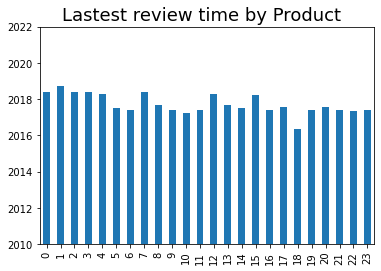

In [20]:
plt.figure()
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Lastest review time by Product", fontsize=18, y=0.95)
plt.ylim((date(2010, 1, 1),  date(2022, 1, 1)))
season_df['lastestdate'].plot.bar()

In [21]:
# Calculate the positive products in terms of normalized value.
myfilter = (mydf2['pos_norm'] > mydf2['neg_norm']) & (mydf2['pos_norm'] > mydf2['neu_norm'])
c = len(mydf2[myfilter])

print("How many postive products:", c)

How many postive products: 24


In [22]:
# Show products name
for n, row in mydf2.iterrows():
    print("{0}: {1}".format(n, row['name']))

0: Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)
1: Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen
2: Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen
3: Amazon Fire TV with 4K Ultra HD and Alexa Voice Remote (Pendant Design) | Streaming Media Player
4: Amazon - Echo Plus w/ Built-In Hub - Silver
5: Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders
6: Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case
7: Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers
8: Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black
9: Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case
10: All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Blue
11: All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Blue
12: Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker
13: Fir

### Delivery 4: Natural Language Processing - Sentiment Analysis (Marcell Veiner, Balin Lin)
Amazon Product Review : Business problem
Perform a sentiment Analysis for Amazon Reviews using NTLK and other required Python
packages and solve the following business problem for Amazon:



Which products should be kept? <br>
- Products with high review counts and not terrible scores. For example, they are positive or neutral in term of NLP sentiment analysis.
    - Product 0, 1, 2, 4, 6, 7, 8, 9, 12, 13, 16, 17, 23

Which products should be dropped? <br>
- The ones we have not kept. Furthermore, it's been a long time nobody buy the products. 
- Products with a lot of bad reviews.
- Products with few reviews.
    - Product 3, 5, 14, 18, 22

Which products are junk? <br>
- Products with low review counts and crap scores. For example, they are negative in term of NLP sentiment analysis.
    - Product 5, 18, 22

Which product should be recommended to customer? <br>
- Products with high review scores and have at least some review counts.
    - Product 1, 4, 6, 8, 16, 17

Which consumer products are the best products? <br>
- The ones with good reviews and a bunch of review counts.
    - Product 16

Which products should be planned for inventory for coming winter? <br>
- The ones that sold a lot during autumn and winter.
    - Product 0, 1, 2, 4, 6, 7, 9, 10, 11, 16, 19, 21, 22

Which products require advertisment? <br>
- Products with a few reviews but positive ones.
- Brand new products.
    - Product 3, 10, 11, 14, 15, 19, 20, 21

In list of opinion O how many quintuples have positive sentiment s? <br>
- It is 24. We count the positive products with respect to the normalized value. The normalized positive value should be greater than the normalized negative and neutral values.